# Deep learning - CNN - Reconnaissance de digits manuscrits avec Tensorflow et Keras

> import des bibliothèques

In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import confusion_matrix
import seaborn
from keras import datasets, layers, models, optimizers, losses, metrics
import pandas as pd
warnings.simplefilter(action='ignore')
from importation1 import Imp

2022-05-12 15:16:35.031116: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-12 15:16:35.031188: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


> la classe Imp importe les images sous formes exploitables par la machine

In [2]:
cls = Imp()
X_train, y_train, X_test, y_test = cls.imp()
X_val, y_val = cls.imp_perso()

> vérification de la taille des données

In [3]:
print(f'Taille des données d\'entraînement : {X_train.shape}')
print(f'Taille de la cible d\'entraînement : {y_train.shape}')
print(f'Taille des données de test : {X_test.shape}')
print(f'Taille de la cible de test : {y_test.shape}')
print(f'Taille des données de validation : {X_val.shape}')
print(f'Taille de la cible de validation : {y_val.shape}')

Taille des données d'entraînement : (60000, 784)
Taille de la cible d'entraînement : (60000,)
Taille des données de test : (10000, 784)
Taille de la cible de test : (10000,)
Taille des données de validation : (30, 784)
Taille de la cible de validation : (30,)


> visualisation de la répartition des labels dans le jeu d'entraînement et dans le jeu de test

Text(0.5, 0, 'digits')

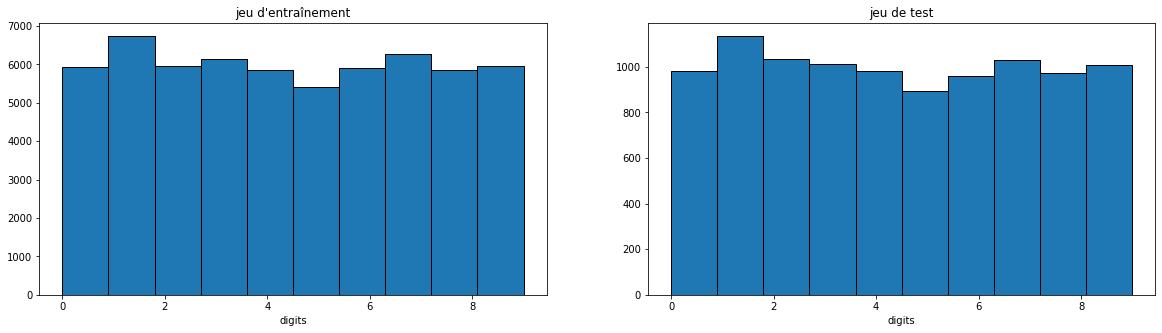

In [4]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('jeu d\'entraînement')
plt.hist(y_train, edgecolor="black")
plt.xlabel('digits')

plt.subplot(1, 2, 2)
plt.title('jeu de test')
plt.hist(y_test, bins=10, edgecolor="black")
plt.xlabel('digits')

Text(0.5, 1.0, 'répartition des données')

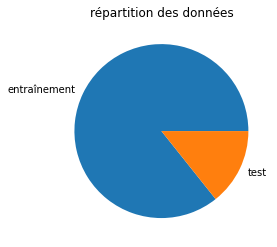

In [5]:

plt.pie([y_train.shape[0], y_test.shape[0]], labels=['entraînement', 'test'])
plt.title('répartition des données')

## Création du modèle CNN

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
Xtr, Xts, ytr, yts = train_test_split(X_train, y_train, random_state=3, stratify=y_train, shuffle=True, test_size=0.10)




X_train = np.concatenate((Xtr, Xts))
y_train = np.concatenate((ytr, yts))

In [8]:
def reshap(nump):
    liste = []

    for i in range(nump.shape[0]):
        im = nump[i].reshape(28, 28, 1)
        liste.append(im)


    return np.array(liste)



X_train = reshap(X_train)
X_test = reshap(X_test)
X_val = reshap(X_val)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3,3), activation='sigmoid', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (4,4), activation='sigmoid'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096))
model.add(layers.Dense(10, activation="sigmoid"))


2022-05-12 15:17:24.884519: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-12 15:17:24.884567: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (erwan-ThinkPad-T460s): /proc/driver/nvidia/version does not exist
2022-05-12 15:17:24.885304: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.compile(optimizer='adam', loss=losses.CategoricalCrossentropy(), metrics='accuracy')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        28736     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 4096)              6

In [13]:
y_train_sauv = y_train.copy()
y_train = tf.keras.utils.to_categorical(y_train) 
y_test_sauv = y_test.copy()
y_test =  tf.keras.utils.to_categorical(y_test) 

In [14]:
y_train[100]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Entraînement du modèle

In [15]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 121s 64ms/step - loss: 0.6746 - accuracy: 0.8028 - val_loss: 0.1852 - val_accuracy: 0.9407
Epoch 2/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.1575 - accuracy: 0.9510 - val_loss: 0.1415 - val_accuracy: 0.9557
Epoch 3/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.1361 - accuracy: 0.9581 - val_loss: 0.1258 - val_accuracy: 0.9603
Epoch 4/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.1206 - accuracy: 0.9625 - val_loss: 0.0937 - val_accuracy: 0.9688
Epoch 5/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.1160 - accuracy: 0.9639 - val_loss: 0.1151 - val_accuracy: 0.9639
Epoch 6/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.1067 - accuracy: 0.9660 - val_loss: 0.1007 - val_accuracy: 0.9694
Epoch 7/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0999 - accuracy: 0.9688 - val_loss: 0

In [16]:
model.save('model.h5')

<AxesSubplot:>

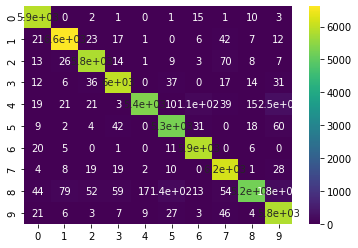

In [17]:
# prédiciton pour la matrice de confusion
y_pred = model.predict(X_train)
y = y_pred.argmax(axis=1)
seaborn.heatmap(confusion_matrix(y_train_sauv, y), annot=True, cmap='viridis')

## Enregistrement des erreurs

In [18]:
# indexing booléen
differents_values = X_train[y_train != y]
differents_values_labels = y_train[y_train != y]

liste = []
for i in range(differents_values.shape[0]):
    im = differents_values[i].ravel()
    liste.append(im)

liste = np.array(liste)

In [21]:
# Il y a 889 photos
# liste.shape

In [22]:
# export dans un dataframe
# data = pd.DataFrame(liste)
# data['y'] = differents_values_labels
# data.to_csv('erreurs.csv', index=False)

## Evaluation du modèle

<AxesSubplot:>

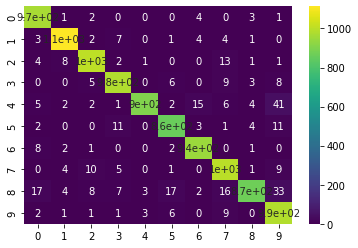

In [23]:
# prédiciton pour la matrice de confusion
y_pred = model.predict(X_test)
y = y_pred.argmax(axis=1)
seaborn.heatmap(confusion_matrix(y_test_sauv, y), annot=True, cmap='viridis')

Text(0.5, 1.0, 'matrice de confusion pour le jeu de test')

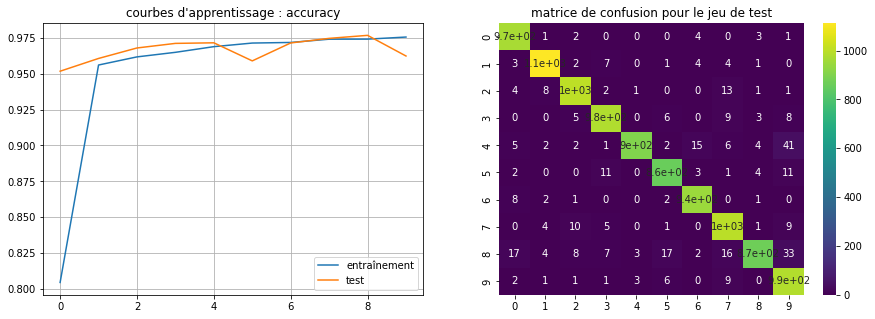

In [24]:
losses = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(losses[['accuracy', 'val_accuracy']], label=['entraînement', 'test'])
plt.grid()
plt.legend()
plt.title('courbes d\'apprentissage : accuracy')

plt.subplot(1,2,2)
seaborn.heatmap(confusion_matrix(y_test_sauv, y), annot=True, cmap='viridis')
plt.title('matrice de confusion pour le jeu de test')

# plt.savefig('courbe_acc.png')

## Evaluation sur un jeu de données créé spécialement pour la validation

Text(0.5, 1.0, 'matrice de confusion pour la validation')

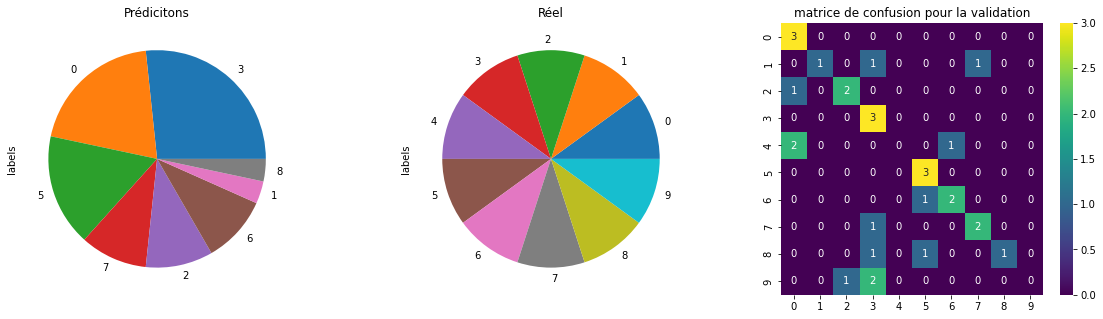

In [35]:
pred = model.predict(X_val)
pred = pred.argmax(axis=1)
pred_s = pd.Series(pred)
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
pred_s.value_counts().plot.pie(title='Prédicitons', label='labels')

plt.subplot(1,3,2)
pred_s = pd.Series(y_val)
pred_s.value_counts().plot.pie(title='Réel', label='labels')

plt.subplot(1,3,3)
seaborn.heatmap(confusion_matrix(y_val, pred, ), annot=True, cmap='viridis')
plt.title('matrice de confusion pour la validation')


# plt.savefig('evaluation.png')